<a href="https://colab.research.google.com/github/alibtasdemir/Coursera_Capstone/blob/master/Coursera_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science Capstone Project: Restaurants in Istanbul

Ali Baran Tasdemir

## PART 1 - GETTING DATA

In [1]:
# Import fundamental libraries for data processing
import numpy as np
import pandas as pd

In [2]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul")[0]

In [3]:
df.head(10)

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD)
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)"
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)"
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)"
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)"
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)"
5,Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)"
6,Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)"
7,Başakşehir,460259,104.30,4413,4.513₺ (622$),"54.152₺ (7,474$)"
8,Bayrampaşa,274735,9.61,28588,3.480₺ (480$),"41.762₺ (5,764$)"
9,Beşiktaş,182649,18.01,10142,"10.560₺ (1,457$)","126.720₺ (17,490$)"


In [4]:
# Removing unneceserry information
df.drop([39, 40, 41, 42], inplace=True)

In [5]:
# Adding Istanbul for all districs.
df["District"]= df["District"].apply(lambda x: "Istanbul-"+ x)

The reason for adding Istanbul for all districts is about getting locations with geopy in next steps. There may be some other places in other cities in Turkey and that could result wrong coordinates.

In [6]:
df

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD)
0,Istanbul-Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)"
1,Istanbul-Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)"
2,Istanbul-Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)"
3,Istanbul-Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)"
4,Istanbul-Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)"
5,Istanbul-Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)"
6,Istanbul-Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)"
7,Istanbul-Başakşehir,460259,104.30,4413,4.513₺ (622$),"54.152₺ (7,474$)"
8,Istanbul-Bayrampaşa,274735,9.61,28588,3.480₺ (480$),"41.762₺ (5,764$)"
9,Istanbul-Beşiktaş,182649,18.01,10142,"10.560₺ (1,457$)","126.720₺ (17,490$)"


In [7]:
# this package convert addresses to geographical coordinates
from geopy.geocoders import Nominatim 

In [8]:
geolocator = Nominatim(user_agent="Istanbul_food")

df['Dist_coord']= df['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Dist_coord'].apply(pd.Series)

df.drop(['Dist_coord'], axis=1, inplace=True)
df.head(10)

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD),Latitude,Longitude
0,Istanbul-Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.876259,29.091027
1,Istanbul-Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.184182,28.740729
2,Istanbul-Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.984749,29.106720
3,Istanbul-Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.980135,28.717547
4,Istanbul-Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.033899,28.857898
5,Istanbul-Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)",41.000290,28.863745
6,Istanbul-Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)",40.983541,28.867974
7,Istanbul-Başakşehir,460259,104.30,4413,4.513₺ (622$),"54.152₺ (7,474$)",41.097693,28.806163
8,Istanbul-Bayrampaşa,274735,9.61,28588,3.480₺ (480$),"41.762₺ (5,764$)",41.035738,28.912260
9,Istanbul-Beşiktaş,182649,18.01,10142,"10.560₺ (1,457$)","126.720₺ (17,490$)",41.042847,29.007528


We get the coordinates from district names and add the information to 2 new columns Latitude and Longitude

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # packege to handle JSON files
import requests

from pandas.io.json import json_normalize # to tranform JSON files into a pd df

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # to create maps

In [10]:
address = 'Istanbul'

geolocator = Nominatim(user_agent="Istanbul_food")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Istanbul are 41.0096334, 28.9651646.


In [11]:
# create a map of Istanbul using latitude and longitude 
map_istanbul = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul) 
    
map_istanbul

So far, we scraped the district data and add the coordinate info to data. Also, made some cleaning and prepared the data for further steps. And finally, we show the district centers on a folium map.

## PART 2 - Getting Locational Data with Foursquare API 

In [12]:
CLIENT_ID = 'ZR02ZV2D4BI4ID1LSLJULQXXKZFSUT1XCDWIOKEDSI4AG2Z0' # Put Your Client Id
CLIENT_SECRET = 'ENGQX1MRROZGVBRHEKUMWG2OCXOLQOJMCMVFYBCMO5GRUOXU' # Put You Client Secret 
VERSION = '20201108'
print('Your credentails:')
print('CLIENT_ID: {}'.format(CLIENT_ID))
print('CLIENT_SECRET: {}'.format(CLIENT_SECRET))

Your credentails:
CLIENT_ID: ZR02ZV2D4BI4ID1LSLJULQXXKZFSUT1XCDWIOKEDSI4AG2Z0
CLIENT_SECRET: ENGQX1MRROZGVBRHEKUMWG2OCXOLQOJMCMVFYBCMO5GRUOXU


In [16]:
# function that extracts categories of the venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=1000):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the request URL for API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [ ]:
Istanbul_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

I get the nearby venues with Foursqaure API for each district in the dataframe. I search a 2km radius and a maximum of 1000 places.

In [21]:
Istanbul_venues.shape

(3741, 7)

In total I have 3741 venues from 38 districts.

In [22]:
Istanbul_Venues_only_restaurant = Istanbul_venues[Istanbul_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Istanbul_Venues_only_restaurant.index = np.arange(1, len(Istanbul_Venues_only_restaurant )+1)

In [23]:
print(Istanbul_Venues_only_restaurant['Venue Category'].value_counts())

Turkish Restaurant                 170
Restaurant                         148
Seafood Restaurant                 110
Kebab Restaurant                    54
Fast Food Restaurant                37
Doner Restaurant                    19
Turkish Home Cooking Restaurant     16
Comfort Food Restaurant             14
Kokoreç Restaurant                  13
Italian Restaurant                  12
Middle Eastern Restaurant           12
Mediterranean Restaurant            11
Vegetarian / Vegan Restaurant        4
Sushi Restaurant                     4
Tantuni Restaurant                   4
Theme Restaurant                     3
American Restaurant                  2
Greek Restaurant                     2
Mexican Restaurant                   2
Eastern European Restaurant          2
Dumpling Restaurant                  1
Bosnian Restaurant                   1
Tibetan Restaurant                   1
Falafel Restaurant                   1
Moroccan Restaurant                  1
Caucasian Restaurant     

In [48]:
print('There are {} restaurants.'.format(len(Istanbul_Venues_only_restaurant['Venue Category'])))

There are 652 restaurants.


In [24]:
print('There are {} unique categories.'.format(len(Istanbul_Venues_only_restaurant['Venue Category'].unique())))

There are 33 unique categories.


I work with restaurant. That's why, I delete every venue except restaurants. And there are only 652 restaurants with 33 unique categories left in the dataset.

In [25]:
# create a dataframe of top 10 categories
Istanbul_Venues_Top10 = Istanbul_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Istanbul_Venues_Top10 = Istanbul_Venues_Top10.reset_index()
Istanbul_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Istanbul_Venues_Top10

,Venue_Category,Frequency
0,Turkish Restaurant,170
1,Restaurant,148
2,Seafood Restaurant,110
3,Kebab Restaurant,54
4,Fast Food Restaurant,37
5,Doner Restaurant,19
6,Turkish Home Cooking Restaurant,16
7,Comfort Food Restaurant,14
8,Kokoreç Restaurant,13
9,Italian Restaurant,12


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


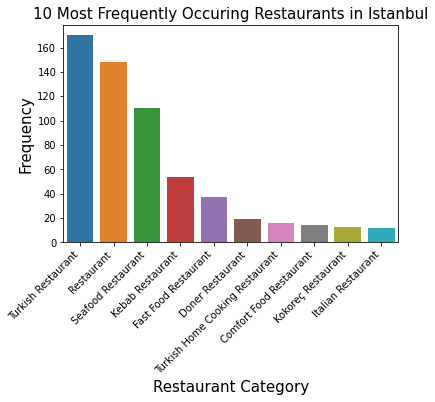

<Figure size 2160x1440 with 0 Axes>

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Istanbul_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Restaurants in Istanbul', fontsize=15)
plt.xlabel("Restaurant Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Top10Venues.png", dpi=300, bbox_inches = "tight")
fig = plt.figure(figsize=(30,20))
plt.tight_layout()
plt.show()

As we see here, the most common type of restaurant is Turkish Restaurants. I think this is the most anticipated result. 

But at the second spot there are "Restaurant" labeled restaurants. And this worries me. Because the restaurant owners not labeled their place or they think they are a generic type of restaurant. Either way is not a positive thing for categorizing restaurants.

At the third spot there are seafood restaurants. It is reasonable because Istanbul is a city surrounded by sea from everywhere. That's why fresh fishes reachable all the time and you can eat your seafood with an amazing view of Bosphorus.

In [27]:
print("Shape of the Data-Frame with Venue Category only Restaurant: ", Istanbul_Venues_only_restaurant.shape)
Istanbul_Venues_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (652, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Istanbul-Adalar,40.876259,29.091027,Heybeliada Şafak Askeri Gazino,40.873609,29.099478,Restaurant
2,Istanbul-Adalar,40.876259,29.091027,Erguvan Evyemekleri,40.876864,29.100745,Turkish Restaurant
3,Istanbul-Adalar,40.876259,29.091027,Heybeliada Deniz Lisesi Kolaylık Tesisleri,40.870648,29.097261,Restaurant
4,Istanbul-Adalar,40.876259,29.091027,Heyamola,40.877757,29.100371,Seafood Restaurant
5,Istanbul-Adalar,40.876259,29.091027,Mavi Restaurant,40.877735,29.100422,Seafood Restaurant
6,Istanbul-Adalar,40.876259,29.091027,Kayıkhane,40.877635,29.099838,Seafood Restaurant
7,Istanbul-Adalar,40.876259,29.091027,Terk-i Dunya Restaurant,40.878181,29.100289,Seafood Restaurant
8,Istanbul-Adalar,40.876259,29.091027,Erguvan Restaurant,40.877154,29.100816,Restaurant
9,Istanbul-Adalar,40.876259,29.091027,Barbayani Heybeliada,40.878039,29.100362,Seafood Restaurant
10,Istanbul-Adalar,40.876259,29.091027,Halki Restaurant,40.877452,29.100650,Mediterranean Restaurant


In [28]:
Istanbul_Venues_restaurant = Istanbul_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [29]:
Istanbul_Venues_restaurant

Neighborhood
Istanbul-Adalar           30
Istanbul-Arnavutköy       11
Istanbul-Ataşehir         23
Istanbul-Avcılar          10
Istanbul-Bahçelievler     11
Istanbul-Bakırköy         18
Istanbul-Bayrampaşa       22
Istanbul-Bağcılar         13
Istanbul-Başakşehir       20
Istanbul-Beykoz           21
Istanbul-Beylikdüzü       16
Istanbul-Beyoğlu          14
Istanbul-Beşiktaş          5
Istanbul-Büyükçekmece     26
Istanbul-Esenler          17
Istanbul-Eyüpsultan       20
Istanbul-Fatih            18
Istanbul-Gaziosmanpaşa    19
Istanbul-Güngören         21
Istanbul-Kadıköy           9
Istanbul-Kartal           24
Istanbul-Kağıthane        14
Istanbul-Küçükçekmece     16
Istanbul-Maltepe          18
Istanbul-Pendik           17
Istanbul-Sancaktepe       18
Istanbul-Sarıyer          23
Istanbul-Silivri          16
Istanbul-Sultanbeyli      23
Istanbul-Sultangazi       10
Istanbul-Tuzla            21
Istanbul-Zeytinburnu      19
Istanbul-Çatalca          15
Istanbul-Çekmeköy         19
I

In [30]:
Istanbul_Venues_restaurant_df  = Istanbul_Venues_restaurant.to_frame().reset_index()
Istanbul_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Istanbul_Venues_restaurant_df.index = np.arange(1, len(Istanbul_Venues_restaurant_df)+1)
list_rest_no =Istanbul_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Istanbul_Venues_restaurant_df['Neighborhood'].to_list()

In [31]:
# one hot encoding
Istanbul_onehot = pd.get_dummies(Istanbul_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Istanbul_onehot['Neighborhood'] = Istanbul_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Istanbul_onehot.columns[-1]] + list(Istanbul_onehot.columns[:-1])
Istanbul_onehot = Istanbul_onehot[fixed_columns]

Istanbul_onehot.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Bosnian Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Tantuni Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
1,Istanbul-Adalar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Istanbul-Adalar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Istanbul-Adalar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Istanbul-Adalar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Istanbul-Adalar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Now we are preparing our data to clustering. So with one hot encoding we label our dataset with 0/1's. We now have (# of restaurants X # of unique types + 1) shaped dataset. Which is 652X34 for our example.

In [32]:
# New dataframe size.
Istanbul_onehot.shape

(652, 34)

In [33]:
Istanbul_grouped = Istanbul_onehot.groupby('Neighborhood').mean().reset_index()
Istanbul_grouped

,Neighborhood,American Restaurant,Arepa Restaurant,Bosnian Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Tantuni Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Istanbul-Adalar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.0000,0.000000,0.133333,0.633333,0.000000,0.000000,0.000000,0.0,0.000000,0.100000,0.000000
1,Istanbul-Arnavutköy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.363636,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.454545,0.000000
2,Istanbul-Ataşehir,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.043478,0.173913,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.391304,0.217391,0.000000,0.000000,0.000000,0.0,0.043478,0.043478,0.000000
3,Istanbul-Avcılar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.0,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.0000,0.000000,0.300000,0.200000,0.000000,0.000000,0.100000,0.0,0.000000,0.000000,0.000000
4,Istanbul-Bahçelievler,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.181818,0.000000,0.090909,0.000000,0.000000,0.000000,0.0000,0.000000,0.090909,0.272727,0.000000,0.000000,0.000000,0.0,0.090909,0.181818,0.000000
5,Istanbul-Bakırköy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0.0,0.000000,0.000000,0.000000,0.055556,0.111111,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.277778,0.055556,0.055556,0.000000,0.000000,0.0,0.000000,0.277778,0.000000
6,Istanbul-Bayrampaşa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.0,0.045455,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.045455,0.000000,0.000000,0.045455,0.0000,0.000000,0.136364,0.045455,0.000000,0.045455,0.000000,0.0,0.000000,0.409091,0.045455
7,Istanbul-Bağcılar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.0,0.000000,0.000000,0.000000,0.000000,0.461538,0.000000,0.076923,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.384615,0.000000
8,Istanbul-Başakşehir,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.150000,0.0,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.100000,0.0000,0.000000,0.150000,0.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.100000,0.000000
9,Istanbul-Beykoz,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.047619,0.000000,0.000000,0.0,0.095238,0.0,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.047619,0.0000,0.000000,0.238095,0.285714,0.000000,0.000000,0.000000,0.0,0.000000,0.095238,0.000000


In [50]:
num_top_venues = 5

for hood in Istanbul_grouped['Neighborhood']:
    print("###### "+hood+" ######")
    temp = Istanbul_grouped[Istanbul_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

###### Istanbul-Adalar ######
                      venue  freq
0        Seafood Restaurant  0.63
1                Restaurant  0.13
2        Turkish Restaurant  0.10
3      Fast Food Restaurant  0.10
4  Mediterranean Restaurant  0.03


###### Istanbul-Arnavutköy ######
                             venue  freq
0               Turkish Restaurant  0.45
1                       Restaurant  0.36
2  Turkish Home Cooking Restaurant  0.09
3             Fast Food Restaurant  0.09
4              American Restaurant  0.00


###### Istanbul-Ataşehir ######
                     venue  freq
0               Restaurant  0.39
1       Seafood Restaurant  0.22
2         Kebab Restaurant  0.17
3  Comfort Food Restaurant  0.04
4         Doner Restaurant  0.04


###### Istanbul-Avcılar ######
                     venue  freq
0               Restaurant   0.3
1       Seafood Restaurant   0.2
2  Comfort Food Restaurant   0.1
3     Fast Food Restaurant   0.1
4       Kokoreç Restaurant   0.1


###### Istanbul-Bah

At this output, we see the frequency of the type of restaurant by district.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Istanbul_grouped['Neighborhood']

for ind in np.arange(Istanbul_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Istanbul_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Istanbul-Adalar,Seafood Restaurant,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant
1,Istanbul-Arnavutköy,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
2,Istanbul-Ataşehir,Restaurant,Seafood Restaurant,Kebab Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant
3,Istanbul-Avcılar,Restaurant,Seafood Restaurant,Fast Food Restaurant,Theme Restaurant,Kebab Restaurant
4,Istanbul-Bahçelievler,Seafood Restaurant,Italian Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Caribbean Restaurant
5,Istanbul-Bakırköy,Turkish Restaurant,Restaurant,Fast Food Restaurant,Kebab Restaurant,Italian Restaurant
6,Istanbul-Bayrampaşa,Turkish Restaurant,Restaurant,Comfort Food Restaurant,Kebab Restaurant,Seafood Restaurant
7,Istanbul-Bağcılar,Kebab Restaurant,Turkish Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
8,Istanbul-Başakşehir,Kebab Restaurant,Fast Food Restaurant,Restaurant,Middle Eastern Restaurant,Turkish Restaurant
9,Istanbul-Beykoz,Seafood Restaurant,Restaurant,Comfort Food Restaurant,Turkish Restaurant,Fast Food Restaurant


We make use of the informating we get before to create this "most common type" feature. And we list the most common 5 types of restaurants for each district.

In [37]:
# num. of clusters
kclusters = 3

Istanbul_grouped_clustering = Istanbul_grouped.drop('Neighborhood', 1)

# k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=9).fit(Istanbul_grouped_clustering)

kmeans.labels_[0:10]

array([1, 0, 2, 2, 2, 0, 0, 0, 2, 2], dtype=int32)

In [38]:
Istanbul_merged = df
Istanbul_merged.head()

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD),Latitude,Longitude
0,Istanbul-Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.876259,29.091027
1,Istanbul-Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.184182,28.740729
2,Istanbul-Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.984749,29.106720
3,Istanbul-Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.980135,28.717547
4,Istanbul-Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.033899,28.857898


In [39]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Istanbul-Adalar,Seafood Restaurant,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant
1,Istanbul-Arnavutköy,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
2,Istanbul-Ataşehir,Restaurant,Seafood Restaurant,Kebab Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant
3,Istanbul-Avcılar,Restaurant,Seafood Restaurant,Fast Food Restaurant,Theme Restaurant,Kebab Restaurant
4,Istanbul-Bahçelievler,Seafood Restaurant,Italian Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Caribbean Restaurant


In [40]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted

neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [41]:
neighborhoods_venues_sorted_w_clusters.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Istanbul-Adalar,Seafood Restaurant,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant
1,0,Istanbul-Arnavutköy,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
2,2,Istanbul-Ataşehir,Restaurant,Seafood Restaurant,Kebab Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant
3,2,Istanbul-Avcılar,Restaurant,Seafood Restaurant,Fast Food Restaurant,Theme Restaurant,Kebab Restaurant
4,2,Istanbul-Bahçelievler,Seafood Restaurant,Italian Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Caribbean Restaurant


In [42]:
Istanbul_merged.rename(columns={'District':'Neighborhood'}, inplace=True)

Istanbul_merged = Istanbul_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Istanbul_merged.drop([17], inplace=True)
Istanbul_merged

Istanbul_merged.head()

,Neighborhood,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Istanbul-Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.876259,29.091027,1.0,Seafood Restaurant,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant
1,Istanbul-Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.184182,28.740729,0.0,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
2,Istanbul-Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.984749,29.106720,2.0,Restaurant,Seafood Restaurant,Kebab Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant
3,Istanbul-Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.980135,28.717547,2.0,Restaurant,Seafood Restaurant,Fast Food Restaurant,Theme Restaurant,Kebab Restaurant
4,Istanbul-Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.033899,28.857898,0.0,Kebab Restaurant,Turkish Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant


Here I merge two datasets as a resulting one. We can see both most common venues and the cluster label at one dataframe.

In [43]:
map_restaurants = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Istanbul_merged['Latitude'], 
                                  Istanbul_merged['Longitude'], 
                                  Istanbul_merged['Neighborhood'], 
                                  Istanbul_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_restaurants)
       
map_restaurants

## PART 3 - Cluster Analysis

### Cluster 1 (RED)

In [44]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 0, Istanbul_merged.columns[[1] + list(range(5, Istanbul_merged.shape[1]))]]

,Population (2019),Annual household income TL(USD),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,282488,"24.360₺ (3,350$)",41.184182,28.740729,0.0,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
4,745125,"38.367₺ (5,295$)",41.033899,28.857898,0.0,Kebab Restaurant,Turkish Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
6,229239,"106.140₺ (14,650$)",40.983541,28.867974,0.0,Turkish Restaurant,Restaurant,Fast Food Restaurant,Kebab Restaurant,Italian Restaurant
8,274735,"41.762₺ (5,764$)",41.035738,28.912260,0.0,Turkish Restaurant,Restaurant,Comfort Food Restaurant,Kebab Restaurant,Seafood Restaurant
9,182649,"126.720₺ (17,490$)",41.042847,29.007528,0.0,Restaurant,Turkish Restaurant,Falafel Restaurant,Arepa Restaurant,Bosnian Restaurant
13,254103,"44.049₺ (6,079$)",41.015691,28.595524,0.0,Turkish Restaurant,Seafood Restaurant,Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant
14,73718,"25.536₺ (3,524$)",41.143563,28.461969,0.0,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,Kebab Restaurant
15,264508,"42.033₺ (5,801$)",41.040210,29.175059,0.0,Turkish Restaurant,Restaurant,Doner Restaurant,Middle Eastern Restaurant,Fast Food Restaurant
16,450344,"34.164₺ (4,715$)",41.033254,28.890953,0.0,Restaurant,Turkish Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,Tantuni Restaurant
18,400513,"56.044₺ (7,735$)",41.046044,28.925324,0.0,Turkish Restaurant,Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant


Most of the districts labeled as cluster 1(0 in code and table) have Turkish Restaurants as the most common restaurant type. So we can assume that this cluster represents Turkish Restaurants.

### Cluster 2 (Purple)

In [45]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 1, Istanbul_merged.columns[[1] + list(range(5, Istanbul_merged.shape[1]))]]

,Population (2019),Annual household income TL(USD),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,15238,"79.821₺ (10,978$)",40.876259,29.091027,1.0,Seafood Restaurant,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant
29,347214,"87.696₺ (12,104$)",41.168592,29.056649,1.0,Seafood Restaurant,Turkish Restaurant,Kebab Restaurant,American Restaurant,Kokoreç Restaurant
30,193680,"28.464₺ (3,928$)",41.073204,28.246922,1.0,Seafood Restaurant,Turkish Restaurant,Kokoreç Restaurant,Doner Restaurant,Turkish Home Cooking Restaurant
33,37692,"29.789₺ (4,111$)",41.174407,29.612522,1.0,Seafood Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,Comfort Food Restaurant
35,267400,"40884₺ (5,643$)",40.816667,29.300833,1.0,Seafood Restaurant,Restaurant,Kebab Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant


All of the districts labeled as cluster 2(1 in code and table) have Seafood Restaurants as the most common restaurant type. So we can assume that this cluster represents Seafood Restaurants.

### Cluster 3 (Green)

In [46]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 2, Istanbul_merged.columns[[1] + list(range(5, Istanbul_merged.shape[1]))]]

,Population (2019),Annual household income TL(USD),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,425094,"78.924₺ (10,854$)",40.984749,29.106720,2.0,Restaurant,Seafood Restaurant,Kebab Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant
3,448882,"43.938₺ (6,064$)",40.980135,28.717547,2.0,Restaurant,Seafood Restaurant,Fast Food Restaurant,Theme Restaurant,Kebab Restaurant
5,611059,"56.088₺ (7,741$)",41.000290,28.863745,2.0,Seafood Restaurant,Italian Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Caribbean Restaurant
7,460259,"54.152₺ (7,474$)",41.097693,28.806163,2.0,Kebab Restaurant,Fast Food Restaurant,Restaurant,Middle Eastern Restaurant,Turkish Restaurant
10,248260,"44.316₺ (6,116$)",41.123936,29.108315,2.0,Seafood Restaurant,Restaurant,Comfort Food Restaurant,Turkish Restaurant,Fast Food Restaurant
11,352412,"51.924₺ (7,166$)",41.001026,28.641984,2.0,Restaurant,Turkish Restaurant,Doner Restaurant,Fast Food Restaurant,Kokoreç Restaurant
12,233323,"57.275₺ (7,905$)",41.028423,28.973681,2.0,Restaurant,Vegetarian / Vegan Restaurant,Caucasian Restaurant,Greek Restaurant,Turkish Restaurant
21,289441,"40.656₺ (5,611$)",41.022871,28.872629,2.0,Turkish Restaurant,Restaurant,Kebab Restaurant,Seafood Restaurant,Comfort Food Restaurant
22,482713,"108.300₺ (14,948$)",40.991572,29.027017,2.0,Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Doner Restaurant,Turkish Home Cooking Restaurant
23,448025,"50.260₺ (6,937$)",41.085980,28.972621,2.0,Turkish Restaurant,Kebab Restaurant,Italian Restaurant,Seafood Restaurant,Doner Restaurant


I am having a hard time commenting on this cluster. Because there are some Turkish, Kebab, Seafood, and one Italian Restaurant at 1st most common column. It looks like a mix of all kinds of restaurants. So with a lazy approach, we can say that this cluster represents "others".